In [10]:
import pandas as pd
import numpy as np
import pyarrow.feather as feather
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

from skmultilearn.model_selection import IterativeStratification

In [2]:
train_df = feather.read_feather('train-ready_data/proteins_featurized.feather')
labels_df = feather.read_feather('train-ready_data/protein_labels.feather')
labels_df

,GO:0065009,GO:0008201,GO:0005125,GO:0015605,GO:0045595,GO:0016667,GO:0060590,GO:0045182,GO:0104004,GO:0016787,...,GO:0003714,GO:0044282,GO:0016877,GO:0000226,GO:0048584,GO:0030426,GO:0042579,GO:0140101,GO:0042887,GO:0072349
P20536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O73864,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
O95231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A0B4J1F4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P54366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A0A286YAI0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A1D5NUC4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Q5RGB0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A2R8QMZ5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Print the average number of labels per sample
print('Average number of labels per sample:', labels_df.sum(axis=1).mean())

Average number of labels per sample: 29.123525441840194


SHUFFLE SPLIT
Average number of labels per sample in train: 29.13857253330521
Average number of labels per sample in test: 29.063339191564147
Average number of labels per sample in train: 29.09188372174769
Average number of labels per sample in test: 29.250087873462213
Average number of labels per sample in train: 29.11031143449682
Average number of labels per sample in test: 29.176379613356765
Average number of labels per sample in train: 29.113009244613167
Average number of labels per sample in test: 29.165588752196836
Average number of labels per sample in train: 29.128853386762277
Average number of labels per sample in test: 29.102214411247804
KFOLD
Average number of labels per sample in train: 29.13857253330521
Average number of labels per sample in test: 29.063339191564147
Average number of labels per sample in train: 29.074896526270464
Average number of labels per sample in test: 29.31804281345566
Average number of labels per sample in train: 29.120987372250585
Average number of

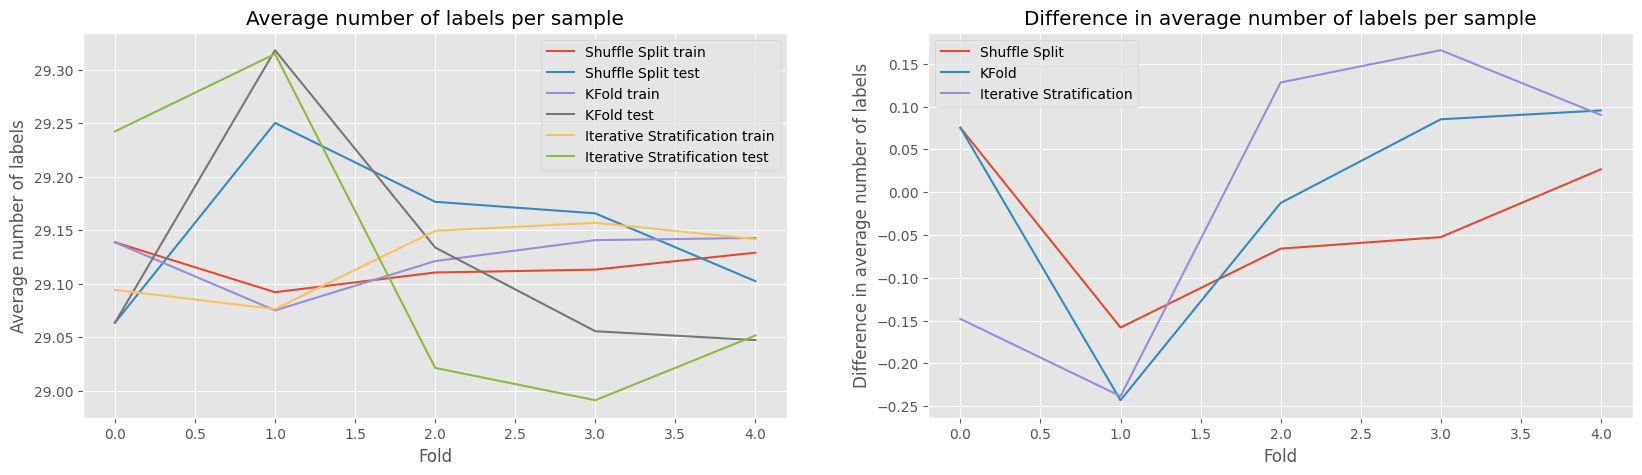

In [16]:
from sklearn.model_selection import ShuffleSplit
ss_train_results = list()
ss_test_results = list()
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
print("SHUFFLE SPLIT")
for train, test in ss.split(labels_df):
    train_coverage = labels_df.iloc[train].sum(axis=1).mean()
    test_coverage = labels_df.iloc[test].sum(axis=1).mean()
    ss_train_results.append(train_coverage)
    ss_test_results.append(test_coverage)
    print('Average number of labels per sample in train:', train_coverage)
    print('Average number of labels per sample in test:', test_coverage)
    print("=========================================")
    

from sklearn.model_selection import KFold

# Calculate the average number of labels per sample for a given fold
kf_train_results = list()
kf_test_results = list()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print("KFOLD")
for train, test in kf.split(labels_df):
    train_coverage = labels_df.iloc[train].sum(axis=1).mean()
    test_coverage = labels_df.iloc[test].sum(axis=1).mean()
    kf_train_results.append(train_coverage)
    kf_test_results.append(test_coverage)
    print('Average number of labels per sample in train:', train_coverage)
    print('Average number of labels per sample in test:', test_coverage)
    print("=========================================")
    
iterstrat_train_results = list()
iterstrat_test_results = list()
iterstrat = IterativeStratification(n_splits=5)
print("ITERATIVE STRATIFICATION")
for train, test in iterstrat.split(labels_df.values, labels_df.values):
    train_coverage = labels_df.iloc[train].sum(axis=1).mean()
    test_coverage = labels_df.iloc[test].sum(axis=1).mean()
    iterstrat_train_results.append(train_coverage)
    iterstrat_test_results.append(test_coverage)
    print('Average number of labels per sample in train:', train_coverage)
    print('Average number of labels per sample in test:', test_coverage)
    print("=========================================")    

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].plot(ss_train_results, label='Shuffle Split train')
ax[0].plot(ss_test_results, label='Shuffle Split test')

ax[0].plot(kf_train_results, label='KFold train')
ax[0].plot(kf_test_results, label='KFold test')

ax[0].plot(iterstrat_train_results, label='Iterative Stratification train')
ax[0].plot(iterstrat_test_results, label='Iterative Stratification test')

ax[0].set_title('Average number of labels per sample')
ax[0].set_xlabel('Fold')
ax[0].set_ylabel('Average number of labels')
ax[0].legend()

ax[1].plot(np.array(ss_train_results) - np.array(ss_test_results), label='Shuffle Split')
ax[1].plot(np.array(kf_train_results) - np.array(kf_test_results), label='KFold')
ax[1].plot(np.array(iterstrat_train_results) - np.array(iterstrat_test_results), label='Iterative Stratification')
ax[1].set_title('Difference in average number of labels per sample')
ax[1].set_xlabel('Fold')
ax[1].set_ylabel('Difference in average number of labels')
ax[1].legend()

plt.show()